# Wine Quality Prediction
Este notebook demonstra como treinar uma rede neural MLP para prever a qualidade de vinhos.

In [ ]:
%cd /content
!git clone https://github.com/cadusouza2001/vinho.git
%cd vinho
!pip install -q pandas scikit-learn tensorflow matplotlib

/content
fatal: destination path 'vinho' already exists and is not an empty directory.
/content/vinho


## 1. Carregamento dos Dados
Aqui carregamos os CSVs e unimos os dados de vinho tinto e branco.

In [ ]:
import pandas as pd
# --- Carregamento e Mapeamento de Classes ---
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

# Add a 'type' feature: 0 for red, 1 for white
red['type'] = 0
white['type'] = 1

data = pd.concat([red, white], ignore_index=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


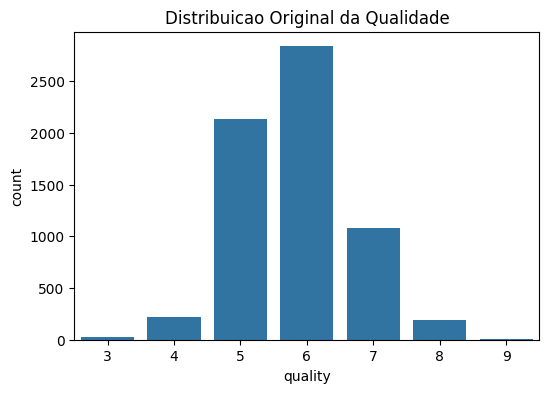

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=data)
plt.title('Distribuicao Original da Qualidade')
plt.show()

## 2. Pré-processamento

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# --- Separação de Features e Rótulos ---
X = data.drop('quality', axis=1)
y = data['quality']

# --- Padronização dos Dados ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Divisão em Treino, Validação e Teste ---
# 1. Primeiro, separamos o conjunto de Teste final (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Depois, separamos o conjunto de Treino e Validação (do restante)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)


## 3. Construção do Modelo

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 18.9411 - mae: 3.8679 - val_loss: 2.1253 - val_mae: 1.0979
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6092 - mae: 0.9829 - val_loss: 1.5193 - val_mae: 0.9329
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1789 - mae: 0.8520 - val_loss: 1.2229 - val_mae: 0.8336
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9791 - mae: 0.7708 - val_loss: 1.0410 - val_mae: 0.7661
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7965 - mae: 0.6989 - val_loss: 0.8730 - val_mae: 0.7038
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7263 - mae: 0.6662 - val_loss: 0.7647 - val_mae: 0.6533
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6247 - mae: 0.6179 - val_loss: 0.7111 - val_mae: 0.6335
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5733 - mae: 0.5941 - val_loss: 0.6510 - val_mae: 0.6024
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

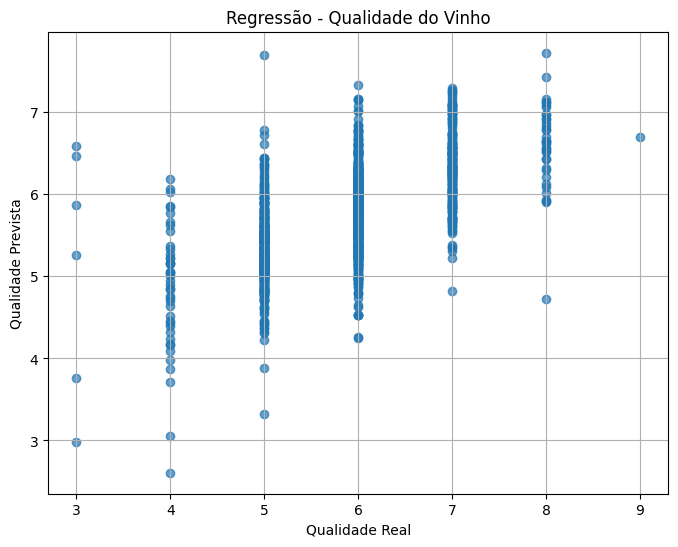

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# --- Compilação do modelo ---
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# --- Treinamento do modelo ---
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# --- Avaliação no conjunto de teste ---
y_pred = model.predict(X_test).flatten()
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# --- Visualização: reais vs previstos ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Qualidade Real")
plt.ylabel("Qualidade Prevista")
plt.title("Regressão - Qualidade do Vinho")
plt.grid(True)
plt.show()



In [ ]:
print("y_test (sem arredondar):", y_test[:10].to_list())
print("y_pred (sem arredondar):", y_pred[:10])

y_test (sem arredondar): [8, 5, 7, 6, 6, 6, 5, 6, 5, 7]
y_pred (sem arredondar): [6.515136  5.150901  7.0530543 5.4076667 5.4815063 6.2994947 5.4216137
 6.3773694 4.7210865 6.7452855]


In [ ]:
y_pred_rounded = np.rint(y_pred).astype(int)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_rounded)
print("Acurácia (previsão de classe após arredondar):", acc)

Acurácia (previsão de classe após arredondar): 0.5607692307692308
